In [ ]:
from model import layers, activations, networks, utils, optimizers, losses, metrics, paddings
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

x_train = utils.expand_dims(x_train, 4)
y_train = utils.expand_dims(y_train, 2)
x_test = utils.expand_dims(x_test, 4)
y_test = utils.expand_dims(y_test, 2)

# x_train = x_train[:400]
# y_train = y_train[:400]
# x_test = x_test[:100]
# y_test = y_test[:100]

print (f'x_train shape={x_train.shape}')
print (f'y_train shape={y_train.shape}')
print (f'x_test shape={x_test.shape}')
print (f'y_test shape={y_test.shape}')

In [ ]:
np.sum(y_train, axis=0)

In [ ]:
model = networks.FeedForward([
    layers.Input(input_shape=(32, 32, 3)),
    layers.Convolution(nr_kernels=32, kernel_size=(3, 3), activation=activations.ReLu, padding=paddings.Valid),
    layers.MaxPooling(pooling_window=(2, 2)),
    layers.Convolution(nr_kernels=64, kernel_size=(3, 3), activation=activations.ReLu, padding=paddings.Valid),
    layers.MaxPooling(pooling_window=(2, 2)),
    layers.Flatten(),
    layers.Dense(nr_neurons=64, activation=activations.Sigmoid),
    layers.Dense(nr_neurons=10, activation=activations.Softmax),
    layers.Output()
])

In [ ]:
model.compile(
    optimizer=optimizers.adam(),
    loss=losses.crossentropy,
    metric=metrics.Accuracy)

In [ ]:
model.summary()

In [ ]:
model.train(x_train, y_train, epochs=20, batch_size=500)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
i = random.randint(0, len(x_train))
image = x_train[i]
p = model.predict(image)
plt.imshow(image, cmap='gray')

In [ ]:
plt.bar(np.arange(0, 10), p.reshape(10,))

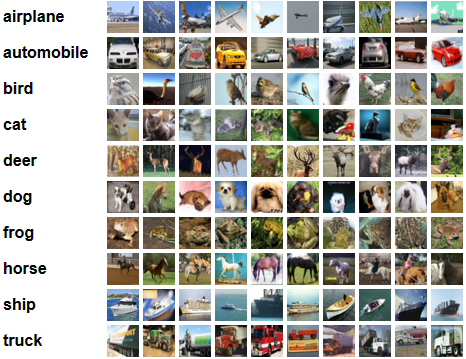

In [ ]:
for i in range(model.layers[1].k):
    a = model.layers[1].o[:, :, i]
    plt.imshow(a, cmap='gray')
    plt.show()